In [7]:
from rubiks import *
from solver import *
import timeit


B' L R' D B D B F D U'


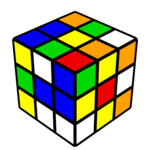

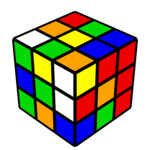

In [8]:
# generate a scramble
steps = 10
moves = generateScramble(steps) # 4 move scramble
c = cube()
c.move(moves)
print(moves)
c.view()
c.view_back()

D' F' B R' U


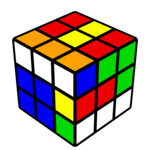

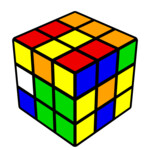

In [9]:
# generate a scramble
steps = 10
moves = ["D'", "F'", 'B', "R'", 'U']
moves = ' '.join(moves)
c = cube()
c.move(moves)
print(moves)
c.view()
c.view_back()

In [10]:
# Heuristics Definition
'''
# of solid rows 
(a row is solid of it contains at least 2 of the same color) - from all perspectives (vertical & horizontal)

Horizontal Rows: 012, 345, 678
Vertical Rows: 036, 147, 258
'''

'\n# of solid rows \n(a row is solid of it contains at least 2 of the same color) - from all perspectives (vertical & horizontal)\n\nHorizontal Rows: 012, 345, 678\nVertical Rows: 036, 147, 258\n'

In [15]:
'''
# of solid rows 
With different tier for scoring:
- Same color for every tile in a row: 10 pints
- 2 colors for tiles in a row: 5 points
- 3 colors for tiles in a row: - 5 points (penalty)
'''

def numberOfSolidRows3(queueItem):
    # Row mappings
    rows = [[0,1,2],[3,4,5],[6,7,8],[0,3,6],[1,4,7],[2,5,8]]
    cube = queueItem[0]
    score = 0
    for face in cube.faces:
        for row in rows:
            rowCount = set()
            for tile in row:
                rowCount.add(face[tile])
            if len(rowCount) ==1:
                score += 10
            if len(rowCount) ==2:
                score += 5
            if len(rowCount) ==3:
                score -= 5
    return score

In [119]:
'''
# of solid rows 
With different tier for scoring:
- Same color for every tile in a row: 10 pints
- 2 colors for tiles in a row: 5 points
- 3 colors for tiles in a row: - 5 points (penalty)

# of solid faces
With different tier for scoring:
- ranged scoring from score of 0 to 7
'''

def numberOfSolidRowsWithSolidFace(queueItem):
    # Row mappings
    rows = [[0,1,2],[3,4,5],[6,7,8],[0,3,6],[1,4,7],[2,5,8]]
    cube = queueItem[0]
    score = 0
    for face in cube.faces:
        faceCount = set()
        for color in face.values():
            faceCount.add(color)
        score += ((5-len(faceCount))/4) * 20
            
        for row in rows:
            rowCount = set()
            for tile in row:
                rowCount.add(face[tile])
            if len(rowCount) ==1:
                score += 10
            if len(rowCount) ==2:
                score += 5
            if len(rowCount) ==3:
                score -= 5
    return score

In [71]:
# test if heuristic can solve the cube
s = solver(c, h=numberOfSolidRows3)
start = timeit.default_timer()
s.solve(maxDepth=steps)
stop = timeit.default_timer()
print('Time: ', stop - start)

The starting score of the cube is : 80
The next score of the cube is : 80
The next score of the cube is : 100
The next score of the cube is : 140
The next score of the cube is : 135
The next score of the cube is : 145
The next score of the cube is : 120
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['L', 'U', 'F', 'B', "R'"]
Time:  0.01344699999998511


In [93]:
steps = 5
eps = 50
maxDepth = 5

F' U' L' D' F'


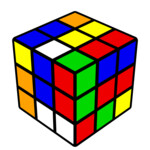

The starting score of the cube is : 30
The next score of the cube is : 30
The next score of the cube is : 75
The next score of the cube is : 165
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['F', 'D', 'L', 'U', 'F']
Time:  0.015629699999863078

L' U F U' F'


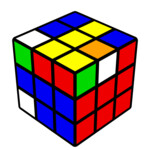

The starting score of the cube is : 190
The next score of the cube is : 190
The next score of the cube is : 215
The next score of the cube is : 195
The next score of the cube is : 220
The next score of the cube is : 190
The next score of the cube is : 205
The next score of the cube is : 190
The next score of the cube is : 195
The next score of the cube is : 195
The next score of the cube is : 230
The next score of the cube is : 195
The next score of the cube is : 235
The next score of the cube is : 190
Oh no no more item in the queue


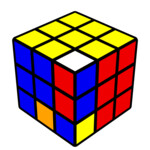

Max score in iteration: 235
["U'", 'R', 'U', "R'", 'F', 'L']
No solution found
Time:  0.6270518999999695

U' L U' L F'


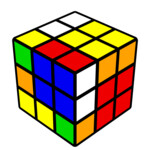

The starting score of the cube is : 170
The next score of the cube is : 170
The next score of the cube is : 185
The next score of the cube is : 185
The next score of the cube is : 215
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['F', "L'", 'U', "L'", 'U']
Time:  0.008165299999745912

F' L' R' B R'


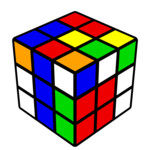

The starting score of the cube is : 45
The next score of the cube is : 45
The next score of the cube is : 85
The next score of the cube is : 120
The next score of the cube is : 150
The next score of the cube is : 200
The next score of the cube is : 255
The next score of the cube is : 205
The next score of the cube is : 180
The next score of the cube is : 240
The next score of the cube is : 215
The next score of the cube is : 150
The next score of the cube is : 120
The next score of the cube is : 200
The next score of the cube is : 255
The next score of the cube is : 205
The next score of the cube is : 165
The next score of the cube is : 225
The next score of the cube is : 180
The next score of the cube is : 120
The next score of the cube is : 120
The next score of the cube is : 130
The next score of the cube is : 135
The next score of the cube is : 130
The next score of the cube is : 140
The next score of the cube is : 135
The next score of the cube is : 120
The next score of the cube 

The next score of the cube is : 190
The next score of the cube is : 190
The next score of the cube is : 175
The next score of the cube is : 205
The next score of the cube is : 175
The next score of the cube is : 200
The next score of the cube is : 110
The next score of the cube is : 175
The next score of the cube is : 200
The next score of the cube is : 175
The next score of the cube is : 205
The next score of the cube is : 165
The next score of the cube is : 175
The next score of the cube is : 205
The next score of the cube is : 175
The next score of the cube is : 200
The next score of the cube is : 105
The next score of the cube is : 165
The next score of the cube is : 175
The next score of the cube is : 205
The next score of the cube is : 175
The next score of the cube is : 200
The next score of the cube is : 155
The next score of the cube is : 185
The next score of the cube is : 190
The next score of the cube is : 190
The next score of the cube is : 175
The next score of the cube i

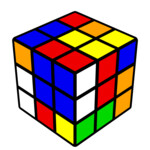

The starting score of the cube is : 60
The next score of the cube is : 60
The next score of the cube is : 95
The next score of the cube is : 125
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 145
The next score of the cube is : 145
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 145
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 155
The next score of the cube is : 180
The next score of the cube is : 135
The next score of the cube is : 165
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 135
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 145
The next score of the cube 

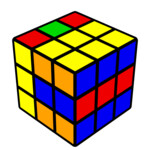

The starting score of the cube is : 240
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["L'", 'U', "D'"]
Time:  0.007262699999955657

B D' L' D' U


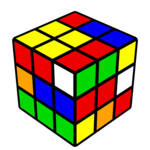

The starting score of the cube is : 90
The next score of the cube is : 90
The next score of the cube is : 180
The next score of the cube is : 185
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["U'", 'D', 'L', 'D', "B'"]
Time:  0.006844600000022183

B' B' F' U' B'


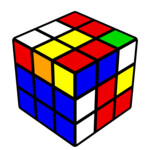

The starting score of the cube is : 145
The next score of the cube is : 145
The next score of the cube is : 160
The next score of the cube is : 200
The next score of the cube is : 210
The next score of the cube is : 160
The next score of the cube is : 210
The next score of the cube is : 160
The next score of the cube is : 160
The next score of the cube is : 210
The next score of the cube is : 170
The next score of the cube is : 195
The next score of the cube is : 150
The next score of the cube is : 160
The next score of the cube is : 150
The next score of the cube is : 185
The next score of the cube is : 270
The next score of the cube is : 235
The next score of the cube is : 195
The next score of the cube is : 225
The next score of the cube is : 270
The next score of the cube is : 255
The next score of the cube is : 155
The next score of the cube is : 155
The next score of the cube is : 150
The next score of the cube is : 155
The next score of the cube is : 150
The next score of the cu

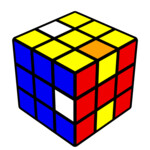

Max score in iteration: 270
['F', 'R', "B'"]
No solution found
Time:  0.8131481000000349

L D R' B' L


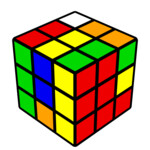

The starting score of the cube is : 110
The next score of the cube is : 110
The next score of the cube is : 180
The next score of the cube is : 195
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["L'", 'B', 'R', "D'", "L'"]
Time:  0.008211699999719713

D D D' R' U'


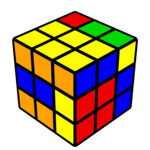

The starting score of the cube is : 195
The next score of the cube is : 195
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['U', 'R', "D'"]
Time:  0.005108999999720254

R D' U' U' B'


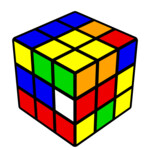

The starting score of the cube is : 80
The next score of the cube is : 80
The next score of the cube is : 120
The next score of the cube is : 240
The next score of the cube is : 240
The next score of the cube is : 250
The next score of the cube is : 240
The next score of the cube is : 260
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['B', "U'", "U'", 'D', "R'"]
Time:  0.017307599999639933

D L R' D' U


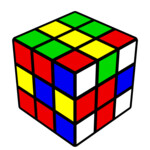

The starting score of the cube is : 190
The next score of the cube is : 190
The next score of the cube is : 200
The next score of the cube is : 240
The next score of the cube is : 270
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["U'", 'D', 'R', "L'", "D'"]
Time:  0.0116704000001846

U L' L' B F


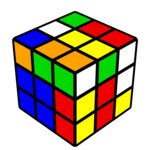

The starting score of the cube is : 100
The next score of the cube is : 100
The next score of the cube is : 180
The next score of the cube is : 240
The next score of the cube is : 250
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["F'", "B'", 'L', 'L', "U'"]
Time:  0.011229400000047463

U U' R' R' F'


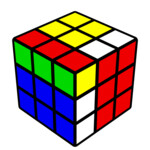

The starting score of the cube is : 240
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['F', 'R', 'R']
Time:  0.008565500000258908

F B' D' D F


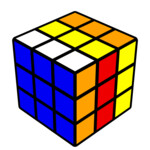

The starting score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 300
The next score of the cube is : 300
The next score of the cube is : 300
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["F'", "F'", 'B']
Time:  0.013185699999667122

L R' B D B'


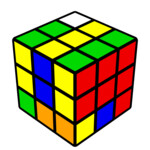

The starting score of the cube is : 145
The next score of the cube is : 145
The next score of the cube is : 165
The next score of the cube is : 175
The next score of the cube is : 190
The next score of the cube is : 205
The next score of the cube is : 225
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 195
The next score of the cube is : 200
The next score of the cube is : 190
The next score of the cube is : 170
The next score of the cube is : 200
The next score of the cube is : 220
The next score of the cube is : 160
The next score of the cube is : 175
The next score of the cube is : 190
The next score of the cube is : 205
The next score of the cube is : 225
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 195
The next score of the cube is : 200
The next score of the cube is : 190
The next score of the cube is : 155
The next score of the cube is : 240
The next score of the cu

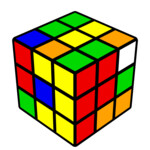

The starting score of the cube is : 130
The next score of the cube is : 130
The next score of the cube is : 145
The next score of the cube is : 160
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 160
The next score of the cube is : 170
The next score of the cube is : 190
The next score of the cube is : 190
The next score of the cube is : 160
The next score of the cube is : 170
The next score of the cube is : 200
The next score of the cube is : 210
The next score of the cube is : 205
The next score of the cube is : 175
The next score of the cube is : 185
The next score of the cube is : 170
The next score of the cube is : 130
The next score of the cube is : 195
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['D', 'R', "F'", 'D', "L'"]
Time:  0.02907950000007986

B' D' U' D' L'


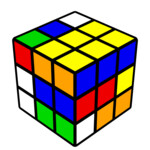

The starting score of the cube is : 85
The next score of the cube is : 85
The next score of the cube is : 135
The next score of the cube is : 145
The next score of the cube is : 135
The next score of the cube is : 140
The next score of the cube is : 145
The next score of the cube is : 135
The next score of the cube is : 165
The next score of the cube is : 135
The next score of the cube is : 165
The next score of the cube is : 120
The next score of the cube is : 240
The next score of the cube is : 250
The next score of the cube is : 240
The next score of the cube is : 260
The next score of the cube is : 240
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['L', 'U', 'D', 'D', 'B']
Time:  0.030379199999970297

D' L R R D'


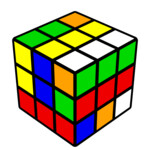

The starting score of the cube is : 55
The next score of the cube is : 55
The next score of the cube is : 120
The next score of the cube is : 240
The next score of the cube is : 270
The next score of the cube is : 240
The next score of the cube is : 260
The next score of the cube is : 240
The next score of the cube is : 250
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['D', 'R', 'R', "L'", 'D']
Time:  0.026077799999711715

U' L F' B' B


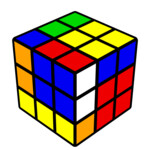

The starting score of the cube is : 205
The next score of the cube is : 205
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['F', "L'", 'U']
Time:  0.005339400000138994

L U' F' D' L


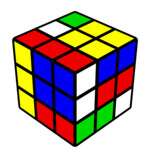

The starting score of the cube is : 115
The next score of the cube is : 115
The next score of the cube is : 160
The next score of the cube is : 195
The next score of the cube is : 215
The next score of the cube is : 225
The next score of the cube is : 205
The next score of the cube is : 215
The next score of the cube is : 215
The next score of the cube is : 215
The next score of the cube is : 205
The next score of the cube is : 205
The next score of the cube is : 205
The next score of the cube is : 205
The next score of the cube is : 175
The next score of the cube is : 185
The next score of the cube is : 185
The next score of the cube is : 230
The next score of the cube is : 230
The next score of the cube is : 245
The next score of the cube is : 185
The next score of the cube is : 190
The next score of the cube is : 230
The next score of the cube is : 175
The next score of the cube is : 175
The next score of the cube is : 145
The next score of the cube is : 215
The next score of the cu

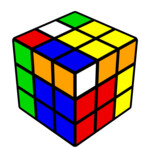

The starting score of the cube is : 120
The next score of the cube is : 120
The next score of the cube is : 125
The next score of the cube is : 155
The next score of the cube is : 180
The next score of the cube is : 195
The next score of the cube is : 195
The next score of the cube is : 250
The next score of the cube is : 205
The next score of the cube is : 205
The next score of the cube is : 195
The next score of the cube is : 195
The next score of the cube is : 180
The next score of the cube is : 210
The next score of the cube is : 165
The next score of the cube is : 195
The next score of the cube is : 235
The next score of the cube is : 210
The next score of the cube is : 185
The next score of the cube is : 190
The next score of the cube is : 195
The next score of the cube is : 190
The next score of the cube is : 190
The next score of the cube is : 170
The next score of the cube is : 170
The next score of the cube is : 175
The next score of the cube is : 170
The next score of the cu

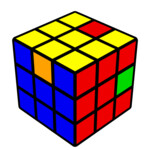

Max score in iteration: 285
['B', 'L', 'U', 'L', 'B']
No solution found
Time:  0.8239315999999235

B L' R F' B


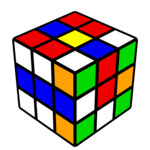

The starting score of the cube is : 170
The next score of the cube is : 170
The next score of the cube is : 190
The next score of the cube is : 190
The next score of the cube is : 240
The next score of the cube is : 270
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['F', "B'", "R'", 'L', "B'"]
Time:  0.013036399999691639

R U' U F' D'


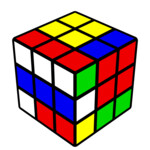

The starting score of the cube is : 175
The next score of the cube is : 175
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['D', 'F', "R'"]
Time:  0.013854599999831407

L U' F F' B'


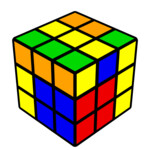

The starting score of the cube is : 175
The next score of the cube is : 175
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['B', 'U', "L'"]
Time:  0.00831560000005993

F U' L' D' L


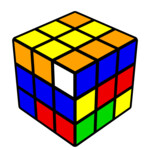

The starting score of the cube is : 80
The next score of the cube is : 80
The next score of the cube is : 135
The next score of the cube is : 165
The next score of the cube is : 165
The next score of the cube is : 170
The next score of the cube is : 165
The next score of the cube is : 185
The next score of the cube is : 165
The next score of the cube is : 140
The next score of the cube is : 175
The next score of the cube is : 120
The next score of the cube is : 140
The next score of the cube is : 175
Oh no no more item in the queue


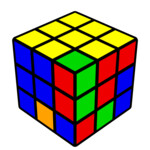

Max score in iteration: 185
['U', "F'", 'R', 'D', "R'"]
No solution found
Time:  0.6519508000001224

R R R' L D'


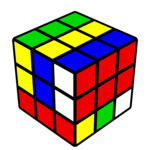

The starting score of the cube is : 120
The next score of the cube is : 120
The next score of the cube is : 180
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['D', "R'", "L'"]
Time:  0.010639499999797408

U L R D' B'


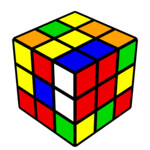

The starting score of the cube is : 55
The next score of the cube is : 55
The next score of the cube is : 70
The next score of the cube is : 120
The next score of the cube is : 155
The next score of the cube is : 190
The next score of the cube is : 155
The next score of the cube is : 160
The next score of the cube is : 155
The next score of the cube is : 190
The next score of the cube is : 155
The next score of the cube is : 120
The next score of the cube is : 155
The next score of the cube is : 190
The next score of the cube is : 155
The next score of the cube is : 160
The next score of the cube is : 155
The next score of the cube is : 190
The next score of the cube is : 155
The next score of the cube is : 130
The next score of the cube is : 180
The next score of the cube is : 195
The next score of the cube is : 185
The next score of the cube is : 200
The next score of the cube is : 140
The next score of the cube is : 185
The next score of the cube is : 200
The next score of the cube 

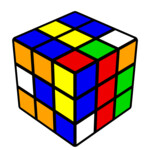

The starting score of the cube is : 105
The next score of the cube is : 105
The next score of the cube is : 170
The next score of the cube is : 240
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["B'", 'R', 'U', "D'", 'L']
Time:  0.021452799999678973

R' U' D' B B'


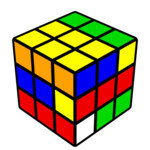

The starting score of the cube is : 120
The next score of the cube is : 120
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['U', 'D', 'R']
Time:  0.016332600000168895

U' B L' F U


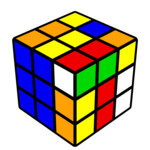

The starting score of the cube is : 95
The next score of the cube is : 95
The next score of the cube is : 115
The next score of the cube is : 130
The next score of the cube is : 145
The next score of the cube is : 135
The next score of the cube is : 160
The next score of the cube is : 135
The next score of the cube is : 165
The next score of the cube is : 150
The next score of the cube is : 160
The next score of the cube is : 170
The next score of the cube is : 165
The next score of the cube is : 125
The next score of the cube is : 145
The next score of the cube is : 130
The next score of the cube is : 150
The next score of the cube is : 165
The next score of the cube is : 165
The next score of the cube is : 155
The next score of the cube is : 165
The next score of the cube is : 140
The next score of the cube is : 165
The next score of the cube is : 175
The next score of the cube is : 165
The next score of the cube is : 155
The next score of the cube is : 165
The next score of the cube

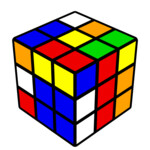

The starting score of the cube is : 45
The next score of the cube is : 45
The next score of the cube is : 85
The next score of the cube is : 130
The next score of the cube is : 160
The next score of the cube is : 210
The next score of the cube is : 265
The next score of the cube is : 230
The next score of the cube is : 190
The next score of the cube is : 230
The next score of the cube is : 210
The next score of the cube is : 165
The next score of the cube is : 180
The next score of the cube is : 145
The next score of the cube is : 135
The next score of the cube is : 120
The next score of the cube is : 135
The next score of the cube is : 155
The next score of the cube is : 160
The next score of the cube is : 170
The next score of the cube is : 155
The next score of the cube is : 175
The next score of the cube is : 135
The next score of the cube is : 150
The next score of the cube is : 140
The next score of the cube is : 140
The next score of the cube is : 135
The next score of the cube 

The next score of the cube is : 105
The next score of the cube is : 120
The next score of the cube is : 120
The next score of the cube is : 115
The next score of the cube is : 130
The next score of the cube is : 105
The next score of the cube is : 115
The next score of the cube is : 95
The next score of the cube is : 130
The next score of the cube is : 110
The next score of the cube is : 150
The next score of the cube is : 135
The next score of the cube is : 120
The next score of the cube is : 115
The next score of the cube is : 105
The next score of the cube is : 130
The next score of the cube is : 120
The next score of the cube is : 115
The next score of the cube is : 95
The next score of the cube is : 120
The next score of the cube is : 95
The next score of the cube is : 95
The next score of the cube is : 90
The next score of the cube is : 115
The next score of the cube is : 125
The next score of the cube is : 115
The next score of the cube is : 110
The next score of the cube is : 1

The next score of the cube is : 130
The next score of the cube is : 155
The next score of the cube is : 145
The next score of the cube is : 105
The next score of the cube is : 75
The next score of the cube is : 95
The next score of the cube is : 120
The next score of the cube is : 100
The next score of the cube is : 95
The next score of the cube is : 85
The next score of the cube is : 120
The next score of the cube is : 85
The next score of the cube is : 85
The next score of the cube is : 75
The next score of the cube is : 85
The next score of the cube is : 75
The next score of the cube is : 70
The next score of the cube is : 120
The next score of the cube is : 145
The next score of the cube is : 135
The next score of the cube is : 180
The next score of the cube is : 160
The next score of the cube is : 160
The next score of the cube is : 180
The next score of the cube is : 140
The next score of the cube is : 130
The next score of the cube is : 140
The next score of the cube is : 140
Th

The next score of the cube is : 110
The next score of the cube is : 115
The next score of the cube is : 85
The next score of the cube is : 95
The next score of the cube is : 85
The next score of the cube is : 90
The next score of the cube is : 85
The next score of the cube is : 70
The next score of the cube is : 95
The next score of the cube is : 95
The next score of the cube is : 110
The next score of the cube is : 100
The next score of the cube is : 95
The next score of the cube is : 115
The next score of the cube is : 110
The next score of the cube is : 80
The next score of the cube is : 80
The next score of the cube is : 90
The next score of the cube is : 70
The next score of the cube is : 70
The next score of the cube is : 80
The next score of the cube is : 80
The next score of the cube is : 80
The next score of the cube is : 75
The next score of the cube is : 70
The next score of the cube is : 100
The next score of the cube is : 90
The next score of the cube is : 75
The next scor

The next score of the cube is : 125
The next score of the cube is : 150
The next score of the cube is : 125
The next score of the cube is : 115
The next score of the cube is : 120
The next score of the cube is : 115
The next score of the cube is : 110
The next score of the cube is : 130
The next score of the cube is : 115
The next score of the cube is : 100
The next score of the cube is : 110
The next score of the cube is : 130
The next score of the cube is : 115
The next score of the cube is : 100
The next score of the cube is : 145
The next score of the cube is : 110
The next score of the cube is : 105
The next score of the cube is : 100
The next score of the cube is : 90
The next score of the cube is : 80
The next score of the cube is : 115
The next score of the cube is : 120
The next score of the cube is : 115
The next score of the cube is : 95
The next score of the cube is : 125
The next score of the cube is : 110
The next score of the cube is : 105
The next score of the cube is :

The next score of the cube is : 130
The next score of the cube is : 100
The next score of the cube is : 105
The next score of the cube is : 95
The next score of the cube is : 125
The next score of the cube is : 115
The next score of the cube is : 105
The next score of the cube is : 95
The next score of the cube is : 105
The next score of the cube is : 95
The next score of the cube is : 75
The next score of the cube is : 115
The next score of the cube is : 125
The next score of the cube is : 115
The next score of the cube is : 75
The next score of the cube is : 85
The next score of the cube is : 80
The next score of the cube is : 80
The next score of the cube is : 75
The next score of the cube is : 75
The next score of the cube is : 70
The next score of the cube is : 90
The next score of the cube is : 145
The next score of the cube is : 175
The next score of the cube is : 155
The next score of the cube is : 95
The next score of the cube is : 100
The next score of the cube is : 100
The n

The next score of the cube is : 80
The next score of the cube is : 100
The next score of the cube is : 110
The next score of the cube is : 100
The next score of the cube is : 80
The next score of the cube is : 80
The next score of the cube is : 80
The next score of the cube is : 65
The next score of the cube is : 80
The next score of the cube is : 100
The next score of the cube is : 120
The next score of the cube is : 115
The next score of the cube is : 85
The next score of the cube is : 90
The next score of the cube is : 80
The next score of the cube is : 115
The next score of the cube is : 80
The next score of the cube is : 70
The next score of the cube is : 85
The next score of the cube is : 105
The next score of the cube is : 85
The next score of the cube is : 70
The next score of the cube is : 75
The next score of the cube is : 105
The next score of the cube is : 90
The next score of the cube is : 80
The next score of the cube is : 80
The next score of the cube is : 80
The next sc

The next score of the cube is : 145
The next score of the cube is : 135
The next score of the cube is : 110
The next score of the cube is : 120
The next score of the cube is : 105
The next score of the cube is : 130
The next score of the cube is : 105
The next score of the cube is : 90
The next score of the cube is : 115
The next score of the cube is : 150
The next score of the cube is : 115
The next score of the cube is : 100
The next score of the cube is : 115
The next score of the cube is : 100
The next score of the cube is : 80
The next score of the cube is : 95
The next score of the cube is : 135
The next score of the cube is : 150
The next score of the cube is : 135
The next score of the cube is : 125
The next score of the cube is : 200
The next score of the cube is : 175
The next score of the cube is : 145
The next score of the cube is : 120
The next score of the cube is : 145
The next score of the cube is : 135
The next score of the cube is : 135
The next score of the cube is :

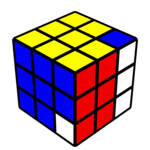

The starting score of the cube is : 235
The next score of the cube is : 235
The next score of the cube is : 245
The next score of the cube is : 250
Oh no no more item in the queue


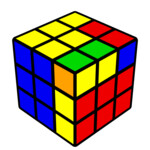

Max score in iteration: 250
["B'", "R'"]
No solution found
Time:  0.7271811999999045

B F F' D' B


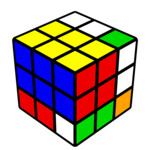

The starting score of the cube is : 215
The next score of the cube is : 215
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["B'", 'D', "B'"]
Time:  0.004313899999942805

F L B R F


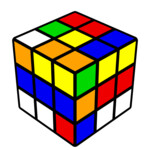

The starting score of the cube is : 25
The next score of the cube is : 25
The next score of the cube is : 80
The next score of the cube is : 155
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["F'", "R'", "B'", "L'", "F'"]
Time:  0.03418179999971471

F' D B L U


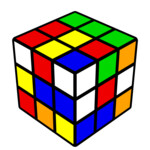

The starting score of the cube is : 70
The next score of the cube is : 70
The next score of the cube is : 140
The next score of the cube is : 210
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["U'", "L'", "B'", "D'", 'F']
Time:  0.030384500000309345

D' D' L' B U'


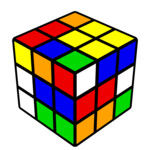

The starting score of the cube is : 60
The next score of the cube is : 60
The next score of the cube is : 155
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['U', "B'", 'L', 'D', 'D']
Time:  0.015043899999909627

U' D F B' D


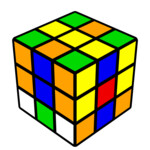

The starting score of the cube is : 190
The next score of the cube is : 190
The next score of the cube is : 240
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["D'", "F'", 'B', 'U', "D'"]
Time:  0.014618700000028184

F' D U' D' L'


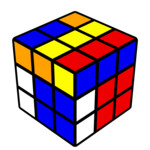

The starting score of the cube is : 165
The next score of the cube is : 165
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['L', 'U', 'F']
Time:  0.007489600000099017

L U' L' R' U'


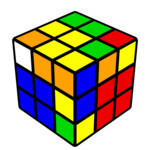

The starting score of the cube is : 105
The next score of the cube is : 105
The next score of the cube is : 145
The next score of the cube is : 240
The next score of the cube is : 255
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['U', 'R', 'L', 'U', "L'"]
Time:  0.015814900000350463

F B B' F' D'


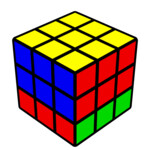

The starting score of the cube is : 300
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['D']
Time:  0.003834600000118371

F' R' F' U' D'


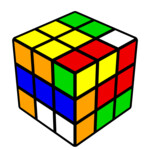

The starting score of the cube is : 115
The next score of the cube is : 115
The next score of the cube is : 175
The next score of the cube is : 215
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['D', 'U', 'F', 'R', 'F']
Time:  0.02475430000004053

B' F' U R' D


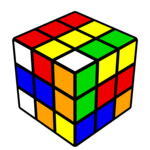

The starting score of the cube is : 15
The next score of the cube is : 15
The next score of the cube is : 85
The next score of the cube is : 120
The next score of the cube is : 180
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["D'", 'R', "U'", 'F', 'B']
Time:  0.02940889999990759

F' D' F L' L


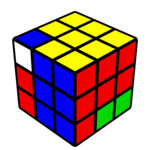

The starting score of the cube is : 240
The next score of the cube is : 240
The next score of the cube is : 245
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["F'", 'D', 'F']
Time:  0.003492199999982404

F R R' D F'


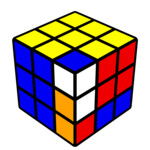

The starting score of the cube is : 240
The next score of the cube is : 240
The next score of the cube is : 245
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['F', "D'", "F'"]
Time:  0.013932500000009895

B U' B' L' B


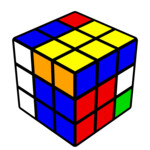

The starting score of the cube is : 190
The next score of the cube is : 190
The next score of the cube is : 215
The next score of the cube is : 245
The next score of the cube is : 265
The next score of the cube is : 195
The next score of the cube is : 190
The next score of the cube is : 235
The next score of the cube is : 235
The next score of the cube is : 190
The next score of the cube is : 240
The next score of the cube is : 255
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["B'", 'L', 'B', 'U', "B'"]
Time:  0.025553500000114582

U U' U' F U'


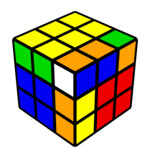

The starting score of the cube is : 215
The next score of the cube is : 215
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['U', "F'", 'U']
Time:  0.005174800000077084

F L R' L' F'


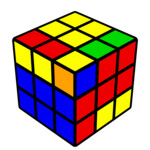

The starting score of the cube is : 240
The next score of the cube is : 240
The next score of the cube is : 255
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
['F', 'R', "F'"]
Time:  0.021827099999882194

D F R B' L


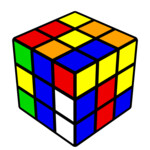

The starting score of the cube is : 90
The next score of the cube is : 90
The next score of the cube is : 130
The next score of the cube is : 165
The next score of the cube is : 165
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["L'", 'B', "R'", "F'", "D'"]
Time:  0.014060999999855994

L F U' B L


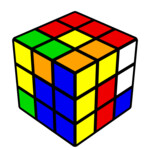

The starting score of the cube is : 95
The next score of the cube is : 95
The next score of the cube is : 125
The next score of the cube is : 225
The next score of the cube is : 245
The next score of the cube is : 245
The next score of the cube is : 255
The next score of the cube is : 240
The next score of the cube is : 300
The next score of the cube is : 360
Found Solution!
["L'", "B'", 'U', "F'", "L'"]
Time:  0.014241699999729462

Average time taken: 0.1428901579999547


In [107]:
# run through more iterations of the first heuristic
time = 0
for i in range(eps):
    
    moves = generateScramble(steps) # 4 move scramble
    c = cube()
    c.move(moves)
    print(moves)
    c.view()
    
    s = solver(c, h=numberOfSolidRows3)
    start = timeit.default_timer()
    s.solve(maxDepth=maxDepth)
    stop = timeit.default_timer()
    timeTaken = stop - start
    time += timeTaken
    print('Time: ', timeTaken)
    print('=================================\n')
    
print('Average time taken: {}'.format(time/eps))

F' L' F U' U


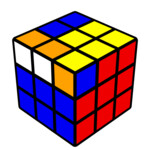

The starting score of the cube is : 320.0
The next score of the cube is : 320.0
The next score of the cube is : 330.0
The next score of the cube is : 320.0
Oh no no more item in the queue


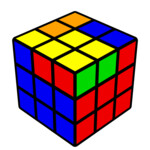

Max score in iteration: 330.0
['U']
No solution found
Time:  0.5974788000003173

U R U U B


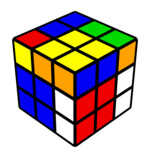

The starting score of the cube is : 195.0
The next score of the cube is : 195.0
The next score of the cube is : 265.0
The next score of the cube is : 320.0
The next score of the cube is : 330.0
The next score of the cube is : 320.0
The next score of the cube is : 285.0
The next score of the cube is : 305.0
The next score of the cube is : 290.0
The next score of the cube is : 265.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["B'", "U'", "U'", "R'", "U'"]
Time:  0.012935799999468145

R' D R R L'


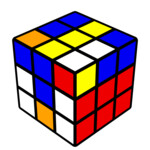

The starting score of the cube is : 215.0
The next score of the cube is : 215.0
The next score of the cube is : 265.0
The next score of the cube is : 325.0
The next score of the cube is : 345.0
The next score of the cube is : 320.0
The next score of the cube is : 325.0
The next score of the cube is : 265.0
The next score of the cube is : 320.0
The next score of the cube is : 325.0
The next score of the cube is : 285.0
The next score of the cube is : 305.0
The next score of the cube is : 290.0
The next score of the cube is : 265.0
The next score of the cube is : 265.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['L', 'R', 'R', "D'", 'R']
Time:  0.02321829999982583

D F R' L L'


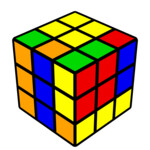

The starting score of the cube is : 245.0
The next score of the cube is : 245.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['R', "F'", "D'"]
Time:  0.004000799999630544

R' R' D' F' D


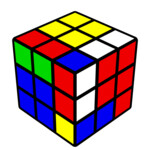

The starting score of the cube is : 225.0
The next score of the cube is : 225.0
The next score of the cube is : 250.0
The next score of the cube is : 280.0
The next score of the cube is : 240.0
The next score of the cube is : 245.0
The next score of the cube is : 245.0
The next score of the cube is : 290.0
The next score of the cube is : 250.0
The next score of the cube is : 295.0
The next score of the cube is : 255.0
The next score of the cube is : 235.0
The next score of the cube is : 280.0
Oh no no more item in the queue


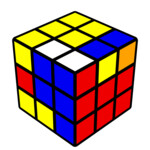

Max score in iteration: 295.0
['F', 'R', 'F', 'R']
No solution found
Time:  0.6339347000002817

B' U R U' F'


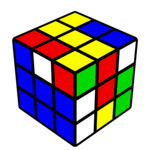

The starting score of the cube is : 170.0
The next score of the cube is : 170.0
The next score of the cube is : 285.0
The next score of the cube is : 285.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['F', 'U', "R'", "U'", 'B']
Time:  0.017834100000072795

F D' L' R' U


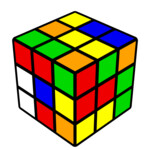

The starting score of the cube is : 55.0
The next score of the cube is : 55.0
The next score of the cube is : 130.0
The next score of the cube is : 245.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["U'", 'R', 'L', 'D', "F'"]
Time:  0.020437000000129046

U' B' F' B' F


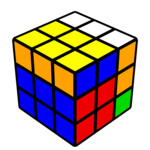

The starting score of the cube is : 310.0
The next score of the cube is : 310.0
The next score of the cube is : 330.0
The next score of the cube is : 310.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['B', 'B', 'U']
Time:  0.013083099999676051

U' F L' D' L


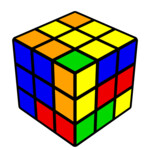

The starting score of the cube is : 140.0
The next score of the cube is : 140.0
The next score of the cube is : 170.0
The next score of the cube is : 205.0
The next score of the cube is : 190.0
The next score of the cube is : 160.0
The next score of the cube is : 200.0
The next score of the cube is : 235.0
The next score of the cube is : 165.0
The next score of the cube is : 175.0
The next score of the cube is : 170.0
The next score of the cube is : 190.0
The next score of the cube is : 165.0
The next score of the cube is : 205.0
The next score of the cube is : 280.0
The next score of the cube is : 205.0
The next score of the cube is : 175.0
The next score of the cube is : 215.0
The next score of the cube is : 215.0
The next score of the cube is : 200.0
The next score of the cube is : 140.0
The next score of the cube is : 155.0
The next score of the cube is : 190.0
The next score of the cube is : 230.0
The next score of the cube is : 250.0
The next score of the cube is : 240.0
The next

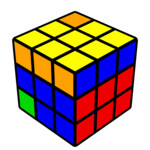

Max score in iteration: 290.0
['U', "L'", 'D', 'L', "U'", "F'"]
No solution found
Time:  0.6258281999998871

R L B L D


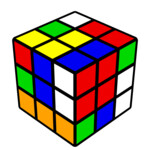

The starting score of the cube is : 75.0
The next score of the cube is : 75.0
The next score of the cube is : 125.0
The next score of the cube is : 185.0
The next score of the cube is : 260.0
The next score of the cube is : 325.0
The next score of the cube is : 365.0
The next score of the cube is : 350.0
The next score of the cube is : 260.0
The next score of the cube is : 365.0
The next score of the cube is : 310.0
The next score of the cube is : 215.0
The next score of the cube is : 240.0
The next score of the cube is : 270.0
The next score of the cube is : 265.0
The next score of the cube is : 215.0
The next score of the cube is : 270.0
The next score of the cube is : 250.0
The next score of the cube is : 200.0
The next score of the cube is : 230.0
The next score of the cube is : 280.0
The next score of the cube is : 235.0
The next score of the cube is : 255.0
The next score of the cube is : 215.0
The next score of the cube is : 220.0
The next score of the cube is : 200.0
The next s

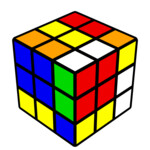

The starting score of the cube is : 160.0
The next score of the cube is : 160.0
The next score of the cube is : 250.0
The next score of the cube is : 255.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["B'", 'R', "F'", 'R', "U'"]
Time:  0.00926290000006702

R F R' U' R


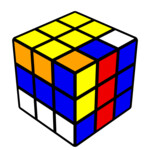

The starting score of the cube is : 220.0
The next score of the cube is : 220.0
The next score of the cube is : 260.0
The next score of the cube is : 330.0
The next score of the cube is : 365.0
The next score of the cube is : 250.0
The next score of the cube is : 320.0
The next score of the cube is : 330.0
The next score of the cube is : 320.0
Oh no no more item in the queue


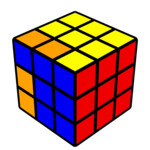

Max score in iteration: 365.0
["F'", "R'", 'U']
No solution found
Time:  0.6059556999998676

B' F B' R D'


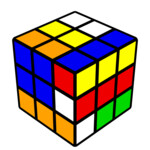

The starting score of the cube is : 105.0
The next score of the cube is : 105.0
The next score of the cube is : 160.0
The next score of the cube is : 260.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['D', "R'", "F'", 'B', 'B']
Time:  0.03772529999969265

L B' L' L' L'


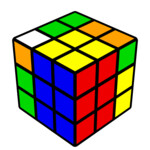

The starting score of the cube is : 265.0
The next score of the cube is : 265.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["L'", 'B', "L'"]
Time:  0.005924799999775132

B' D' B F' F'


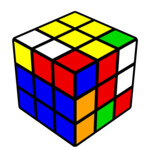

The starting score of the cube is : 180.0
The next score of the cube is : 180.0
The next score of the cube is : 250.0
The next score of the cube is : 310.0
The next score of the cube is : 315.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['F', 'F', "B'", 'D', 'B']
Time:  0.010543099999267724

B U R U' L


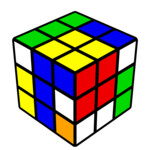

The starting score of the cube is : 170.0
The next score of the cube is : 170.0
The next score of the cube is : 275.0
The next score of the cube is : 315.0
The next score of the cube is : 205.0
The next score of the cube is : 265.0
The next score of the cube is : 320.0
The next score of the cube is : 275.0
The next score of the cube is : 315.0
The next score of the cube is : 265.0
The next score of the cube is : 265.0
The next score of the cube is : 265.0
The next score of the cube is : 310.0
The next score of the cube is : 230.0
The next score of the cube is : 255.0
The next score of the cube is : 235.0
The next score of the cube is : 240.0
The next score of the cube is : 265.0
The next score of the cube is : 250.0
The next score of the cube is : 280.0
The next score of the cube is : 270.0
The next score of the cube is : 255.0
The next score of the cube is : 195.0
The next score of the cube is : 230.0
The next score of the cube is : 275.0
The next score of the cube is : 315.0
The next

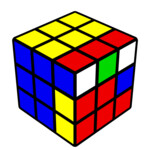

Max score in iteration: 320.0
["R'", "L'", "B'"]
No solution found
Time:  0.7202071000001524

U U R' R D


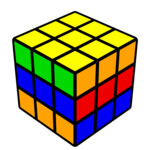

The starting score of the cube is : 260.0
The next score of the cube is : 260.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['U', 'U', "D'"]
Time:  0.01079329999993206

D D' B' B R'


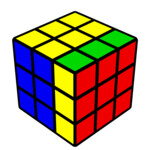

The starting score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['R']
Time:  0.0014516000001094653

B U U' R' F


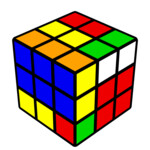

The starting score of the cube is : 185.0
The next score of the cube is : 185.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["F'", 'R', "B'"]
Time:  0.013845299999957206

B D' D U L'


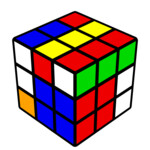

The starting score of the cube is : 245.0
The next score of the cube is : 245.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['L', "U'", "B'"]
Time:  0.009120799999436713

U' U' U F' D'


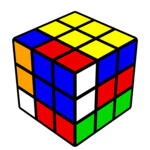

The starting score of the cube is : 195.0
The next score of the cube is : 195.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['D', 'F', 'U']
Time:  0.009087899999940419

R' U' R' D' B


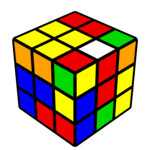

The starting score of the cube is : 100.0
The next score of the cube is : 100.0
The next score of the cube is : 155.0
The next score of the cube is : 265.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["B'", 'D', 'R', 'U', 'R']
Time:  0.021392399999967893

L' B' B' D' D


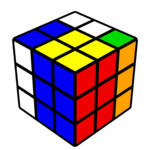

The starting score of the cube is : 310.0
The next score of the cube is : 310.0
The next score of the cube is : 330.0
The next score of the cube is : 310.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['B', 'B', 'L']
Time:  0.005078199999843491

D' R' D' F' U'


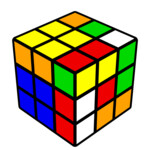

The starting score of the cube is : 100.0
The next score of the cube is : 100.0
The next score of the cube is : 160.0
The next score of the cube is : 265.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['U', 'F', 'D', 'R', 'D']
Time:  0.009495399999650544

L F' R U U


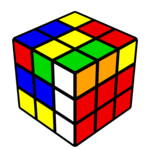

The starting score of the cube is : 120.0
The next score of the cube is : 120.0
The next score of the cube is : 200.0
The next score of the cube is : 205.0
The next score of the cube is : 205.0
The next score of the cube is : 205.0
The next score of the cube is : 205.0
The next score of the cube is : 205.0
The next score of the cube is : 225.0
The next score of the cube is : 205.0
The next score of the cube is : 205.0
The next score of the cube is : 215.0
The next score of the cube is : 205.0
The next score of the cube is : 205.0
The next score of the cube is : 215.0
The next score of the cube is : 205.0
The next score of the cube is : 225.0
The next score of the cube is : 200.0
The next score of the cube is : 155.0
The next score of the cube is : 185.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["U'", "U'", "R'", 'F', "L'"]
Time:  0.0254056000003402

F' L R' R R'


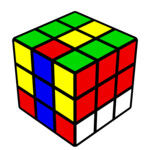

The starting score of the cube is : 310.0
The next score of the cube is : 310.0
The next score of the cube is : 350.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['R', "L'", 'F']
Time:  0.005968100000245613

F R' U' D F'


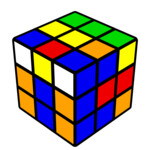

The starting score of the cube is : 130.0
The next score of the cube is : 130.0
The next score of the cube is : 195.0
The next score of the cube is : 255.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['F', 'U', "D'", 'R', "F'"]
Time:  0.020652100000006612

U' D B' L U


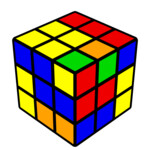

The starting score of the cube is : 185.0
The next score of the cube is : 185.0
The next score of the cube is : 195.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["U'", "L'", 'B', 'U', "D'"]
Time:  0.008886799999345385

B' U' L B U


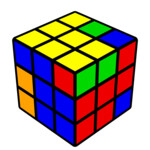

The starting score of the cube is : 225.0
The next score of the cube is : 225.0
The next score of the cube is : 260.0
The next score of the cube is : 295.0
The next score of the cube is : 330.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["U'", "B'", "L'", 'U', 'B']
Time:  0.021173399999497633

L' D D' F' R


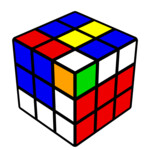

The starting score of the cube is : 265.0
The next score of the cube is : 265.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["R'", 'F', 'L']
Time:  0.007943800000248302

R' L' R L' U'


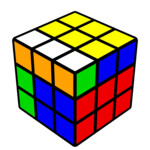

The starting score of the cube is : 310.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['U', 'L', 'L']
Time:  0.00899799999933748

B D B R B


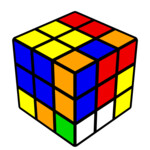

The starting score of the cube is : 225.0
The next score of the cube is : 225.0
The next score of the cube is : 245.0
The next score of the cube is : 235.0
The next score of the cube is : 265.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["B'", "R'", "B'", "D'", "B'"]
Time:  0.011579600000004575

U' U' D' U' L'


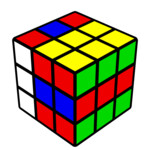

The starting score of the cube is : 310.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['L', "U'", 'D']
Time:  0.004482899999857182

R' R' F' D U


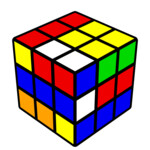

The starting score of the cube is : 150.0
The next score of the cube is : 150.0
The next score of the cube is : 255.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["D'", "U'", 'F', 'R', 'R']
Time:  0.018595300000015413

B' R F B D


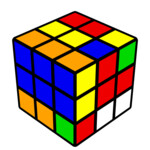

The starting score of the cube is : 130.0
The next score of the cube is : 130.0
The next score of the cube is : 185.0
The next score of the cube is : 310.0
The next score of the cube is : 325.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["D'", "F'", "B'", "R'", 'B']
Time:  0.032063100000414124

L' U' R' L F


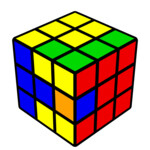

The starting score of the cube is : 325.0
The next score of the cube is : 325.0
The next score of the cube is : 370.0
The next score of the cube is : 345.0
Oh no no more item in the queue


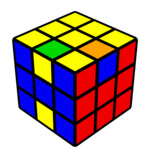

Max score in iteration: 370.0
['R']
No solution found
Time:  0.6308865000000878

B R' L' D' R


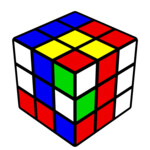

The starting score of the cube is : 180.0
The next score of the cube is : 180.0
The next score of the cube is : 180.0
The next score of the cube is : 200.0
The next score of the cube is : 185.0
The next score of the cube is : 185.0
The next score of the cube is : 180.0
The next score of the cube is : 195.0
Oh no no more item in the queue


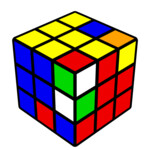

Max score in iteration: 200.0
['L', "B'"]
No solution found
Time:  0.7193146999998135

U' U' B D' U'


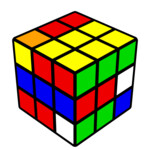

The starting score of the cube is : 180.0
The next score of the cube is : 180.0
The next score of the cube is : 265.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['D', 'U', "B'", 'U', 'U']
Time:  0.017121400000178255

L D F' R F'


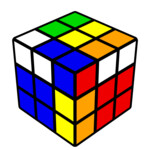

The starting score of the cube is : 175.0
The next score of the cube is : 175.0
The next score of the cube is : 225.0
The next score of the cube is : 185.0
The next score of the cube is : 190.0
The next score of the cube is : 225.0
The next score of the cube is : 180.0
The next score of the cube is : 255.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['F', "R'", 'F', "D'", "L'"]
Time:  0.02023390000067593

L U' F F' U'


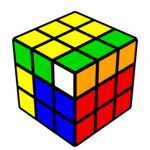

The starting score of the cube is : 310.0
The next score of the cube is : 310.0
The next score of the cube is : 330.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['U', 'U', "L'"]
Time:  0.011993299999630835

U' D' F D' U


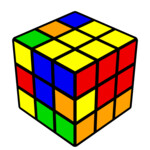

The starting score of the cube is : 180.0
The next score of the cube is : 180.0
The next score of the cube is : 200.0
The next score of the cube is : 220.0
The next score of the cube is : 270.0
The next score of the cube is : 225.0
The next score of the cube is : 200.0
The next score of the cube is : 270.0
The next score of the cube is : 210.0
The next score of the cube is : 190.0
The next score of the cube is : 210.0
The next score of the cube is : 280.0
The next score of the cube is : 220.0
The next score of the cube is : 235.0
The next score of the cube is : 280.0
The next score of the cube is : 210.0
The next score of the cube is : 255.0
The next score of the cube is : 280.0
The next score of the cube is : 190.0
The next score of the cube is : 190.0
The next score of the cube is : 190.0
The next score of the cube is : 240.0
The next score of the cube is : 245.0
The next score of the cube is : 200.0
The next score of the cube is : 245.0
The next score of the cube is : 185.0
The next

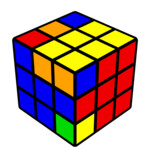

Max score in iteration: 280.0
['D', "F'", 'D']
No solution found
Time:  0.6505438000003778

B' F' B' F D'


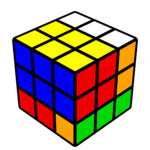

The starting score of the cube is : 310.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['D', 'B', 'B']
Time:  0.004527299999608658

R D D F' D'


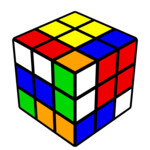

The starting score of the cube is : 205.0
The next score of the cube is : 205.0
The next score of the cube is : 225.0
The next score of the cube is : 235.0
The next score of the cube is : 220.0
The next score of the cube is : 220.0
The next score of the cube is : 260.0
The next score of the cube is : 315.0
The next score of the cube is : 265.0
The next score of the cube is : 235.0
The next score of the cube is : 210.0
The next score of the cube is : 310.0
The next score of the cube is : 330.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['D', 'F', 'D', 'D', "R'"]
Time:  0.016143499999998312

U F' D U' D


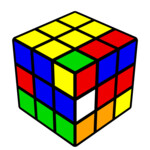

The starting score of the cube is : 180.0
The next score of the cube is : 180.0
The next score of the cube is : 250.0
The next score of the cube is : 310.0
The next score of the cube is : 325.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["D'", "D'", 'U', 'F', "U'"]
Time:  0.013968100000056438

B D R F' U'


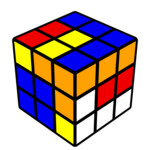

The starting score of the cube is : 215.0
The next score of the cube is : 215.0
The next score of the cube is : 250.0
The next score of the cube is : 275.0
The next score of the cube is : 290.0
The next score of the cube is : 255.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['U', 'F', "R'", "D'", "B'"]
Time:  0.013924199999564735

U R D L R'


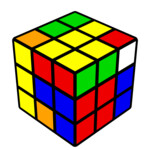

The starting score of the cube is : 125.0
The next score of the cube is : 125.0
The next score of the cube is : 205.0
The next score of the cube is : 275.0
The next score of the cube is : 280.0
The next score of the cube is : 255.0
The next score of the cube is : 280.0
The next score of the cube is : 180.0
The next score of the cube is : 220.0
The next score of the cube is : 285.0
The next score of the cube is : 235.0
The next score of the cube is : 190.0
The next score of the cube is : 180.0
The next score of the cube is : 225.0
The next score of the cube is : 190.0
The next score of the cube is : 155.0
The next score of the cube is : 175.0
The next score of the cube is : 180.0
The next score of the cube is : 180.0
The next score of the cube is : 185.0
The next score of the cube is : 200.0
The next score of the cube is : 175.0
The next score of the cube is : 180.0
The next score of the cube is : 220.0
The next score of the cube is : 285.0
The next score of the cube is : 235.0
The next

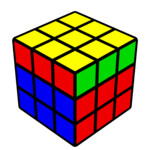

Max score in iteration: 400.0
['L', 'L', 'R', 'L', "D'", "R'"]
No solution found
Time:  0.8940819999997984

F' D' L' B L'


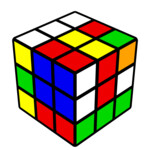

The starting score of the cube is : 125.0
The next score of the cube is : 125.0
The next score of the cube is : 165.0
The next score of the cube is : 220.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['L', "B'", 'L', 'D', 'F']
Time:  0.014815100000305392

L U' B' D' D


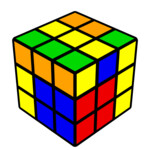

The starting score of the cube is : 230.0
The next score of the cube is : 230.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['B', 'U', "L'"]
Time:  0.012229699999807053

U' F' L U R


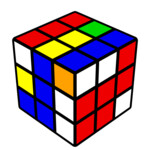

The starting score of the cube is : 150.0
The next score of the cube is : 150.0
The next score of the cube is : 260.0
The next score of the cube is : 295.0
The next score of the cube is : 330.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
["R'", "U'", "L'", 'F', 'U']
Time:  0.016155600000274717

L' F U L' L'


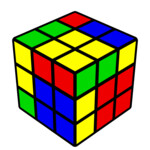

The starting score of the cube is : 255.0
The next score of the cube is : 255.0
The next score of the cube is : 285.0
The next score of the cube is : 305.0
The next score of the cube is : 320.0
The next score of the cube is : 285.0
The next score of the cube is : 310.0
The next score of the cube is : 400.0
The next score of the cube is : 480.0
Found Solution!
['L', 'L', "U'", "F'", 'L']
Time:  0.02002600000014354

Average time taken: 0.13569280399993658


In [123]:
# run through more iterations of the first heuristic
time = 0
for i in range(eps):
    
    moves = generateScramble(steps) # 4 move scramble
    c = cube()
    c.move(moves)
    print(moves)
    c.view()
    
    s = solver(c, h=numberOfSolidRowsWithSolidFace)
    start = timeit.default_timer()
    s.solve(maxDepth=maxDepth)
    stop = timeit.default_timer()
    timeTaken = stop - start
    time += timeTaken
    print('Time: ', timeTaken)
    print('=================================\n')
    
print('Average time taken: {}'.format(time/eps))